# IMPORTANT STEPS
Basic EDA :
*  Missing data
*  Duplicate data
*  Outliers or anomalies
*  Data Visualisation
*  feature encoding
*  feature selection





Model Building :
* separate your independent and dependent data
* split the data
* model selection
* model training
* model prediction
* model evaluation


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

import xgboost
from xgboost import XGBRegressor

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error




# Load the dataset


In [ ]:
df = pd.read_csv('/content/USA_Housing.csv')

In [ ]:
df.head()


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [ ]:
df.shape


(5000, 7)

In [ ]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [ ]:
df.nunique()

,0
Avg. Area Income,5000
Avg. Area House Age,5000
Avg. Area Number of Rooms,5000
Avg. Area Number of Bedrooms,255
Area Population,5000
Price,5000
Address,5000


In [ ]:
df['Avg. Area Number of Bedrooms'] = df['Avg. Area Number of Bedrooms'].astype(int)



In [ ]:

df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [ ]:
df.drop('Address',axis=1,inplace=True)

In [ ]:
df.isna().sum()

,0
Avg. Area Income,0
Avg. Area House Age,0
Avg. Area Number of Rooms,0
Avg. Area Number of Bedrooms,0
Area Population,0
Price,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

# EASY METHOD

In [ ]:
df.select_dtypes(include=np.number).columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

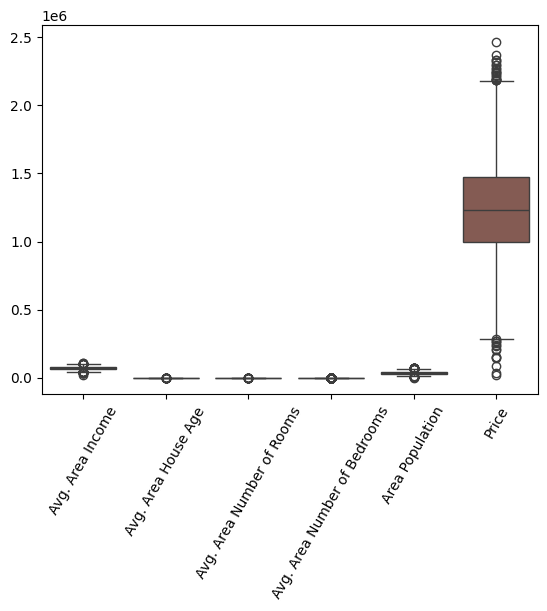

In [ ]:
sns.boxplot(df)
plt.xticks(rotation=60)
plt.show()

<Figure size 20000x5000 with 0 Axes>

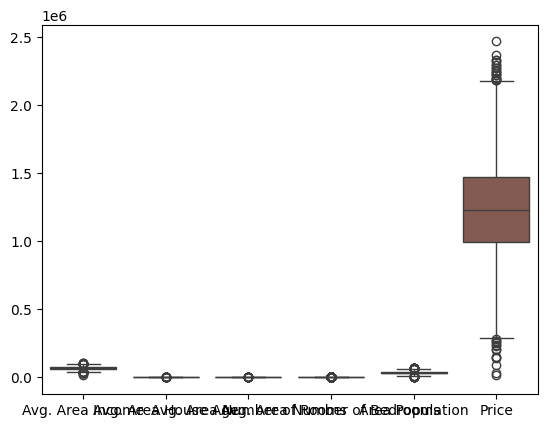

<Figure size 20000x5000 with 0 Axes>

In [ ]:
sns.boxplot(df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price']])

plt.figure(figsize=(200,50))

(39500.0, 98000.0)

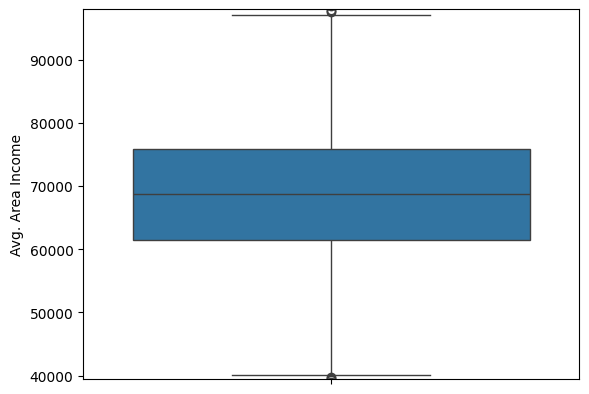

In [ ]:
sns.boxplot(df['Avg. Area Income'])
plt.ylim(39500,98000)

(3.3, 8.7)

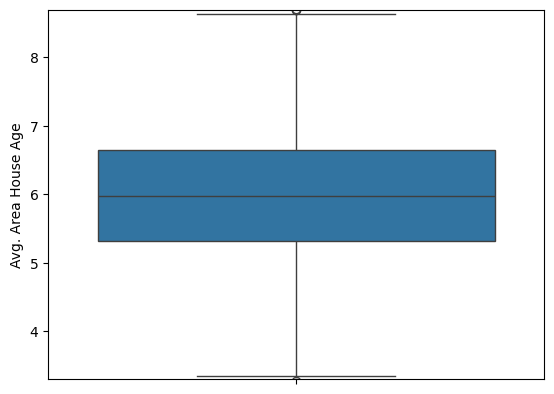

In [ ]:
sns.boxplot(df['Avg. Area House Age'])
plt.ylim(3.3,8.7)

(4.1, 9.8)

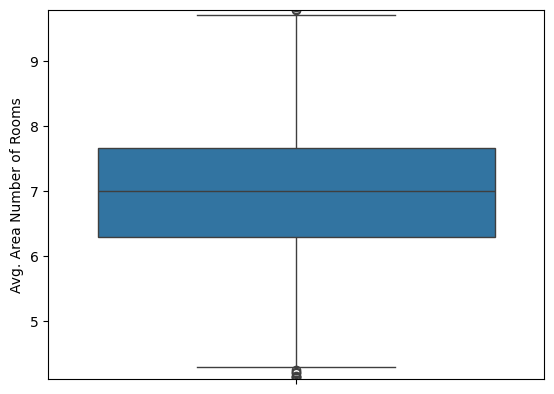

In [ ]:
sns.boxplot(df['Avg. Area Number of Rooms'])
plt.ylim(4.1,9.8)

(0.0, 5.5)

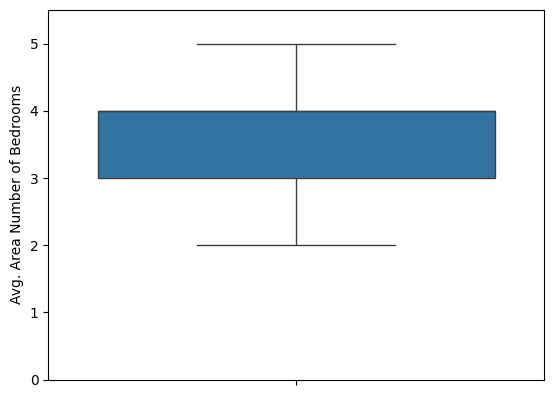

In [ ]:
sns.boxplot(df['Avg. Area Number of Bedrooms'])
plt.ylim(0,5.5)

(8800.0, 64000.0)

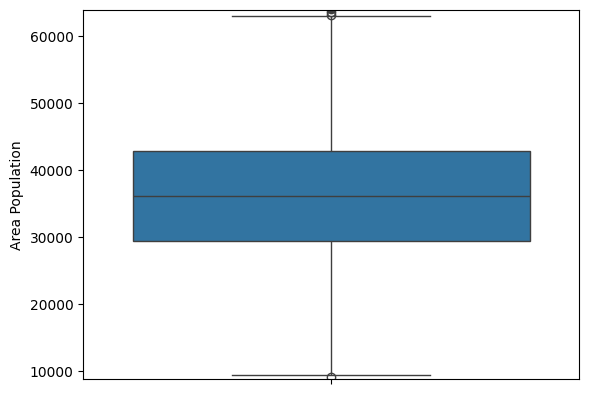

In [ ]:
sns.boxplot(df['Area Population'])
plt.ylim(8800,64000)

(250000.0, 2220000.0)

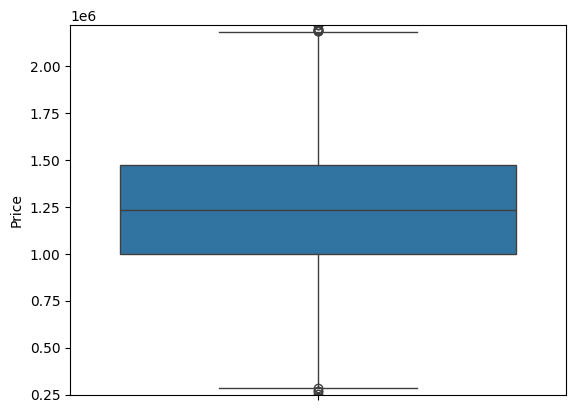

In [ ]:
sns.boxplot(df['Price'])
plt.ylim(250000,2220000)

In [ ]:
Min = df.min()
Q1= df.quantile(0.25)
Q2= df.quantile(0.50)
Q3= df.quantile(0.75)
Max= df.max()



In [ ]:

print("\n___________First Quantile is :____________\n")
print(Q1)
print("\n___________Second Quantile is:_____________\n")
print(Q2)
print("\n___________Third Quantile is :____________\n")
print(Q3)



___________First Quantile is :____________

Avg. Area Income                 61480.562388
Avg. Area House Age                  5.322283
Avg. Area Number of Rooms            6.299250
Avg. Area Number of Bedrooms         3.000000
Area Population                  29403.928702
Price                           997577.135049
Name: 0.25, dtype: float64

___________Second Quantile is:_____________

Avg. Area Income                6.880429e+04
Avg. Area House Age             5.970429e+00
Avg. Area Number of Rooms       7.002902e+00
Avg. Area Number of Bedrooms    4.000000e+00
Area Population                 3.619941e+04
Price                           1.232669e+06
Name: 0.5, dtype: float64

___________Third Quantile is :____________

Avg. Area Income                7.578334e+04
Avg. Area House Age             6.650808e+00
Avg. Area Number of Rooms       7.665871e+00
Avg. Area Number of Bedrooms    4.000000e+00
Area Population                 4.286129e+04
Price                           1.471210

In [ ]:
IQR = Q3 - Q1
lower_range = Q1 - (1.5 * IQR)
upper_range = Q3 + (1.5 * IQR)

data = df[~((df < lower_range) | (df > upper_range)).any(axis=1)]
data.shape

(4267, 6)

<Axes: ylabel='Avg. Area Income'>

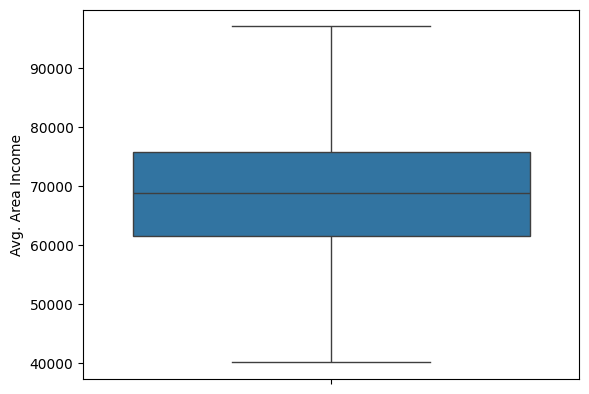

In [ ]:
sns.boxplot(data['Avg. Area Income'])


<Axes: >

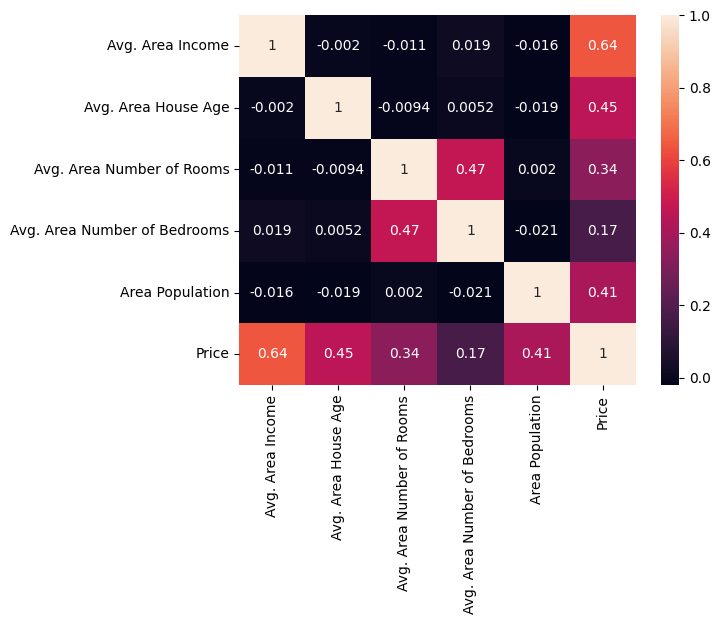

In [ ]:
sns.heatmap(df.corr(),annot=True)

# MODEL TRAINING


In [ ]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

In [ ]:
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms','Avg. Area Number of Bedrooms', 'Area Population']]

In [ ]:
y = df['Price']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


# Linear Regression model


In [ ]:
lr = LinearRegression()
lr.fit(X_train,y_train)


LinearRegression()

In [ ]:
print(f'Training accuracy {round(lr.score(X_train,y_train),2)*100} %')


Training accuracy 92.0 %


In [ ]:
print(f'Test accuracy {round(lr.score(X_test,y_test),2)*100 } %')


Test accuracy 92.0 %


# Decision Tree

In [ ]:
dtree = DecisionTreeRegressor(max_depth = 9)
dtree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=9)

In [ ]:
print(f'Training accuracy {round(dtree.score(X_train,y_train),2)*100} %')
print(f'Test accuracy {round(dtree.score(X_test,y_test),2)*100 } %')

Training accuracy 92.0 %
Test accuracy 77.0 %


# Gradient boosting

In [ ]:
gb = GradientBoostingRegressor()
gb.fit(X_train,y_train)

GradientBoostingRegressor()

In [ ]:
print(f'Training accuracy {round(gb.score(X_train,y_train),2)*100} %')
print(f'Test accuracy {round(gb.score(X_test,y_test),2)*100 } %')

Training accuracy 93.0 %
Test accuracy 90.0 %


# Model Prediction

In [ ]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [ ]:
lr.score(X_test,y_test)

0.9179901810713831

In [ ]:
X_train[:3]

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
4227,66547.016454,5.846095,6.847298,4,27850.822901
4676,53722.008599,6.401391,7.787764,3,47649.224665
800,64838.492899,6.437157,8.699544,4,32921.010068


In [ ]:
y_train[:3]

,Price
4227,1.094880e+06
4676,1.300389e+06
800,1.382172e+06


In [ ]:
y_train_pred[:3]

array([1023253.03532395, 1249308.99593972, 1382525.64907477])

# For coefficient

In [ ]:
lr.coef_

array([2.16521684e+01, 1.64669256e+05, 1.19592725e+05, 2.48669517e+03,
       1.52698572e+01])

In [ ]:
X.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population'],
      dtype='object')

In [ ]:
pd.DataFrame(lr.coef_,index=X.columns,columns=['Coefficient'])

,Coefficient
Avg. Area Income,21.652168
Avg. Area House Age,164669.256497
Avg. Area Number of Rooms,119592.725192
Avg. Area Number of Bedrooms,2486.695168
Area Population,15.269857


# Model evaluation

For training data


In [ ]:
def training_evaluation(actual,predicted):
  mae = mean_absolute_error(actual , predicted)
  mse = mean_squared_error(actual , predicted)
  rmse = np.sqrt(mean_squared_error(actual , predicted))
  r2 = r2_score(actual , predicted)
  print('MAE : ',mae)
  print('MSE : ',mse)
  print('RMSE : ',rmse)
  print('R2 : ',r2)

  plt.scatter(actual,predicted)
  plt.plot([actual.min(),actual.max()], [actual.min(),actual.max()] , color= 'k' , lw=3 , ls='--')
  plt.title('Best fit line ')
  plt.xlabel('Actual')
  plt.ylabel('Predicted')
  plt.show()

MAE :  81506.64532005772
MSE :  10256164631.122976
RMSE :  101272.72402341598
R2 :  0.9179799770127142


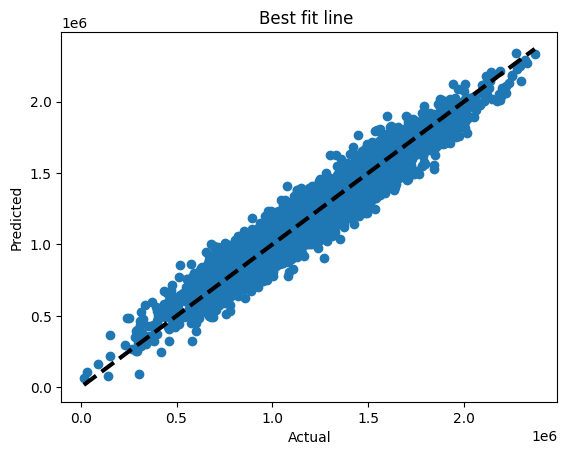

In [ ]:
training_evaluation(y_train,y_train_pred)

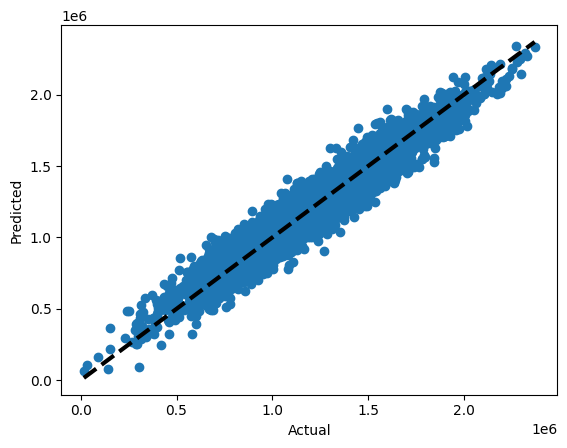

In [ ]:
# plt.scatter(y_train,y_train_pred)
# plt.plot([y_train.min(),y_train.max()], [y_train.min(),y_train.max()] , color= 'k' , lw=3 , ls='--')
# plt.xlabel('Actual')
# plt.ylabel('Predicted')
# plt.show()

For test data


In [ ]:
def test_evaluation(actual,predicted):
  mae = mean_absolute_error(actual , predicted)
  mse = mean_squared_error(actual , predicted)
  rmse = np.sqrt(mean_squared_error(actual , predicted))
  r2 = r2_score(actual , predicted)
  print('MAE : ',mae)
  print('MSE : ',mse)
  print('RMSE : ',rmse)
  print('R2 : ',r2)

  plt.scatter(actual,predicted , color = 'r')
  plt.plot([actual.min(),actual.max()], [actual.min(),actual.max()] , color= 'k' , lw=3 , ls='--')
  plt.title('Best fit line for test evaluation ')
  plt.xlabel('Actual')
  plt.ylabel('Predicted')
  plt.show()

MAE :  80884.34729914163
MSE :  10089869250.014898
RMSE :  100448.34120091231
R2 :  0.9179901810713831


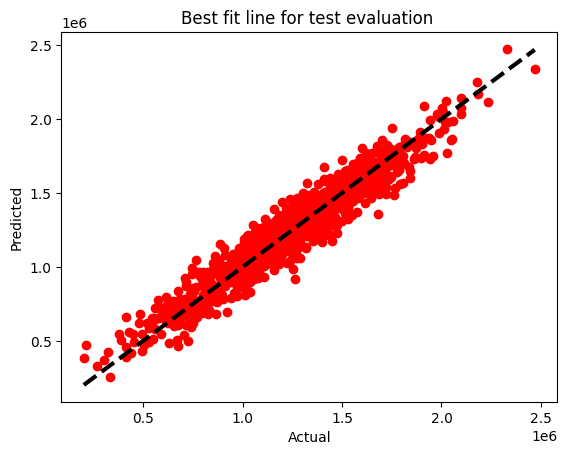

In [ ]:
test_evaluation(y_test,y_test_pred)